<H1> Lab 5 </H1>

<H2> Function block </H2>

<H3>
Draw plot
</H3>

In [25]:


from re import A
from xml.etree.ElementTree import QName
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import pandas as pd

def plpl(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    tmp = [1,1]
    for i in range(len(x)):
        #print(i)
        if i > 0:
            if c[-1] != foo(x[i],y[i]):     
                c.append(foo(x[i],y[i]))
        else:
            c.append(foo(x[i],y[i]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def plpl1(foo, x: list[float],y: list[float]) -> list[float]:
    c =[]
    tmp = [1,1]
    for i in range(len(x)):
        #print(i)
        
        c.append(foo(x[i],y[i]))
    #с = set(c)
    #c.sort()
    #print(c)
    return c

def draw_counterplot(x_min, xk, flag, foo):
    fig, ax = plt.subplots(figsize = (5,5))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax.grid(linestyle = '-')



    pass

def draw_counterplot1(x_min, xk, A, flag, foo):
    fig, ax = plt.subplots(figsize = (5,5))

    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    #print(v)
    # построим линии уровня
    ax.contour(x, y, z, levels = v)
    # траектория поиска точки минимума
    ax.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')

    for k in range(1,len(A[0])):
        
        ax.plot ([A[0][k-1],A[0][k]], [A[1][k-1],A[1][k]], marker='o', markersize = 3, color = 'green')
        #ax.plot (A[0][k], A[1][k], marker='o', markersize = 3, color = 'green')


    # подписи к осям
    ax.set_xlabel('$x$', fontsize = 12)
    ax.set_ylabel('$y$', fontsize = 12)
    ax.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax.grid(linestyle = '-')



    return ax


def draw_all(x0, x_min, xk, flag, foo, ang_a = 20, ang_b = 145):

    fig = plt.figure(figsize = (15, 5), dpi=120)

    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax2 = fig.add_subplot(1, 2, 2)
    #ax3 = fig.add_subplot(1, 3, 3)
    plt.subplots_adjust(wspace=0.7)

    coef = max(abs(x0[0] - x_min[0]), abs(x0[1]-x_min[1]))
    #coef = max(abs( min(xk[0]) - x_min[0]), abs(min(xk[1])-x_min[1]))
    x, y = np.meshgrid(np.linspace(x_min[0] - coef, x_min[0] + coef, 100),np.linspace(x_min[1] - coef, x_min[1] + coef, 100))
    z = foo(x, y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    

    ax1.plot_surface(x,y,z, cmap = 'plasma', alpha = 0.5)
    ax1.contour3D(x,y,z, 120, cmap = 'plasma', alpha = 0.3)
    ax1.contour3D(x,y,z, levels = v, colors = 'black', alpha = 0.5) #cmap = 'tab20')

    v = plpl1(foo, xk[0], xk[1])
    
    ax1.plot(xk[0], xk[1], v, marker='o', markersize = 3, color = 'red')

    ax1.scatter(xk[0][0], xk[1][0], foo(xk[0][0], xk[1][0]), s = 20, c = 'green', label="$x_{beg}$ - точка начального приближения")
    ax1.scatter(x_min[0], x_min[1], foo(x_min[0], x_min[1]), s = 20, c = 'red', label="$x_{min}$ - точка минимума")
    ax1.legend(shadow=True, fontsize=8)
    ax1.view_init(ang_a, ang_b)
    ax1.set_xlabel('$x$', fontsize = 12)
    ax1.set_ylabel('$y$', fontsize = 12)
    ax1.set_zlabel('$z$', fontsize = 12)
    ax1.set_title('График поверхности функции', fontdict = {'fontsize' : 14})


    #x, y = np.meshgrid(xk[0], xk[1])
    x, y = np.linspace(min(xk[0]) - 1/2, max(xk[0]) + 1/2), np.linspace(min(xk[1]) - 1/2, max(xk[1]) + 1/2)
    
    x, y = np.meshgrid(x ,y)
    
    z = foo(x,y)

    v = plpl(foo, xk[0], xk[1])
    v.sort()
    # построим линии уровня
    ax2.contour(x, y, z, v)
    # траектория поиска точки минимума
    ax2.plot(xk[0], xk[1], marker='o', markersize = 3, color = 'red')
    # подписи к осям
    ax2.set_xlabel('$x$', fontsize = 12)
    ax2.set_ylabel('$y$', fontsize = 12)
    ax2.set_title('Линии уровня и траектория поиска точки' , fontdict = {'fontsize' : 14})

    # создадим сетку 
    ax2.grid(linestyle = '-')

    # k = range(len(w_norm))
    # #x, y = np.meshgrid(k , w_norm)
    # ax3.plot(k, w_norm)
    # ax3.set_xlabel('$k$')
    # ax3.set_ylabel('$ \| \! \| w_k \| \! \| $')
    # ax3.set_title('Зависимость нормы \n антиградиента $ \| \! \| w_k \| \! \| $ от параметра $k$')



    pass




<H3> Golden Ratio </H3>

In [26]:
import numpy as np
import math
eps = 10**(-2)
def method_goldenRatio(f, b: float = 1, a: float = 0, e = eps * 1e-1):
    tau = (math.sqrt(5) + 1) / 2
    n_f = 0
    Ak, Bk = a, b
    lk = Bk - Ak
    Xk1 = Bk - (Bk - Ak) / tau
    Xk2 = Ak + (Bk - Ak) / tau
    
    y1, y2 = f(Xk1), f(Xk2)
    n_f += 2

    while lk >= e:
        if y1 < y2:
            Bk = Xk2
            Xk2 = Xk1
            Xk1 = Ak + Bk - Xk2
            y2 = y1
            y1 = f(Xk1)
            n_f += 1 
        else:
            
            Ak = Xk1
            Xk1 = Xk2
            Xk2 = Ak + Bk - Xk1
            y1 = y2
            y2 = f(Xk2)
            n_f += 1
            
        lk = Bk - Ak
    return (Ak + Bk) / 2, n_f


<H3> KvaziNewton

In [47]:
import numpy as np
import math
import matplotlib.pyplot as plt
from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

x0 = [-1, -2]
e = 10 ** (-2)

def newton_method(foo, eps = e, x = np.array(x0), flag: int = 0, flag1: int = 0):

    n_f = 0
    n_g = 0
    n_d = 0

    kappa_k = 1
    kappa_max = 25

    x = np.array(x)

    x_, y_ = Symbol('x'), Symbol('y')
    grad_f = lambdify((x_, y_), derive_by_array(foo(x_, y_), (x_, y_)), 'numpy')
    
    
    f = lambda x: foo(x[0], x[1])
    
    grad = lambda x: grad_f(x[0], x[1])

    anti_grad = lambda x: np.array(-grad_f(x[0], x[1]))

    xk = [[],[]]
    xk[0].append(x[0])
    xk[1].append(x[1])

    h = lambdify((x_, y_), [[diff(foo(x_, y_), x_, 2), diff(foo(x_, y_), x_, y_)], [diff(foo(x_, y_), y_, x_), diff(foo(x_, y_), y_, 2)]], 'numpy')
    H = lambda x: np.array(h(x[0],x[1]))  

    n = 2 #hess.ndim #момент обновления алгоритма
    Ak = np.identity(n)

    w_norm = []    
    wk = np.array(anti_grad(x))
    n_g += 1
    w_norm.append(np.linalg.norm(wk))

    x_prev = x
    wk_prev = wk
    
    n_update = n
    n_update_counter = 1
    while w_norm[-1] > eps:

        n_d += 1
        
        pk = Ak.dot(wk)     
        #print(f' H(x) = {np.linalg.inv(H(x))} \n ----- \n wk = {wk} \n pk = {pk} \n ')

        #pk = pk / np.linalg.norm(pk)

        phi_k = lambda kappa: f(x + kappa * pk)

        temp = 0 
        if flag1 == 0:       
            kappa_k, temp = method_goldenRatio(phi_k, 0.9, 0, eps/1000)
        else:
            kappa_k, nnn, temp = optimize.golden(phi_k, full_output=True)      


        n_f += temp

        x = x + kappa_k * pk
        wk = anti_grad(x)
        n_g += 1

        w_norm.append(np.linalg.norm(wk))
        xk[0].append(x[0])
        xk[1].append(x[1])
        
        if n_d % n_update == 13531:
            Ak = np.identity(n)
            n_update_counter += 1
            n_update =  n * n_update_counter

        else:
            dx = x - x_prev
            dx_m = np.array([[dx[0], 0], [dx[1], 0]])
            dw = wk - wk_prev
            dw_m = np.array([[dw[0], 0], [dw[1], 0]])

            if flag == 0: #DFP
                dA =  - ( dx_m.dot(dx_m.T) / (dw.dot(dx)) + (Ak.dot(dw_m.dot(dw_m.T.dot(Ak.T)))) / np.dot(Ak.dot(dw), dw) )          
                #print(f' d 1 = {(dx_m.dot(dx_m.T) / (dw.dot(dx)))}')
                
                #print(f' d 2 = {(Ak.dot(dw_m.dot(dw_m.T.dot(Ak.T)))) / np.dot(Ak.dot(dw), dw)}')
                #print(dA)
                #print((Ak.dot(dw_m.dot(dw_m.T.dot(Ak.T)))) / np.dot(Ak.dot(dw), dw))
            elif flag == 1: #BFSh                
                ro_k = np.dot(Ak.dot(dw), dw)
                r_k = (Ak.dot(dw) / ro_k ) - (dx / (dx.dot(dw)))                
                r_k_m = np.array([[r_k[0], 0],[r_k[1], 0]])
                dA =  -( dx_m.dot(dx_m.T) / (dw.dot(dx)) + (Ak.dot(dw_m.dot(dw_m.T.dot(Ak.T)))) / np.dot(Ak.dot(dw), dw) )          
                dA = dA + ro_k * (r_k_m.dot(r_k_m.T))            
            
            elif flag == 2: #Paul
                tmp = (dx + Ak.dot(dw))
                tmp_m = np.array([[tmp[0], 0], [tmp[1], 0]])
                dA = - ( tmp_m.dot(tmp_m.T) / (dw.dot(tmp)))
                
            Ak = Ak + dA 
        #print(f'pk = {pk} \n wk = {wk} \n A = {Ak} \n ')
        x_prev = x
        wk_prev = wk
        


        
    return x, xk, w_norm, n_f, n_g, n_d


In [28]:
from functools import reduce
import numpy as np
B = np.array([[1/2, 0], [-1 , 0]])#
C = np.array([1/2,-1])
R = np.array([0,-1])
#print(np.dot(C, B), np.dot(B.T, C))
print(B.dot(B.T))
#r = np.ones(2, 4)
#print(r)
print(C.dot(R))
#print(np.dot(C, T))
#np.matrix.transpose(C)


[[ 0.25 -0.5 ]
 [-0.5   1.  ]]
1.0


<H3> Print function </H3>

In [40]:

from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize
import math

#x0 = [-1,-2]
def print_res(foo, x0 = x0, e_help = 2, flag = 0, flag1 = 0):

    #tabledata = []

    x_, y_ = Symbol('x'), Symbol('y')
    eps = 10**(-e_help)

    print("\n", ' ' * 30, "Квазиньютоновские методы","\n")
    print("Дано:")
    print("-" * 24)
    print("      Целевая функция:    f(x, y) =", foo(x_,y_))
    print("Начальное приближение:    (x, y) =", x0)
    print(" Точность приближения:    eps =", eps)
    print("-" * 24)

    for i in range (3):
        #temp = []
        #print("\n" + "_" * 80)

        if i == 0:
            method_name = "Метод ДФП"
            print("\n", ' ' * 30, f"{method_name} \n")
        elif i == 1:
            method_name = "Метод БФШ"
            print("\n", ' ' * 30, f"{method_name} \n")
        elif i == 2:
            method_name = "Метод Пауэлла"
            print("\n", ' ' * 30, f"{method_name} \n")
        
        
        x_min, xk, w_norm, n_f, n_g , n_d= newton_method(foo, eps, x0, i, flag1)
        
        print("             Точка минимума функции:     x_min =", [round(x_min[0], e_help), round(x_min[1], e_help)])
        print("  Значение функции в точке минимума:  f(x_min) =", round(foo(x_min[0], x_min[1]), e_help))
        print("                Количество итераций:         k =",   n_d)#len(w_norm) - 1)
        print("      Количество вычислений функции:       n_f =", n_f)
        print("  Количество вычисленных градиентов:       n_g =", n_g)
        #print("Количество вычисленных матриц Гессе:    n_hess =", n_hess)
        # if flag == 0:
        #     draw_all(x0, x_min, xk, w_norm, i, foo, 30, -20)
        # elif flag == 1:
        #     draw_all(x0, x_min, xk, w_norm, i, foo, 45, 170)

        draw_counterplot(x_min, xk, i, foo)

        #print(xk)
        #draw_counterplot_only(x_min, xk, w_norm, i, fk)
    plt.show()
    
    #a = print_tables(tabledata)


    pass



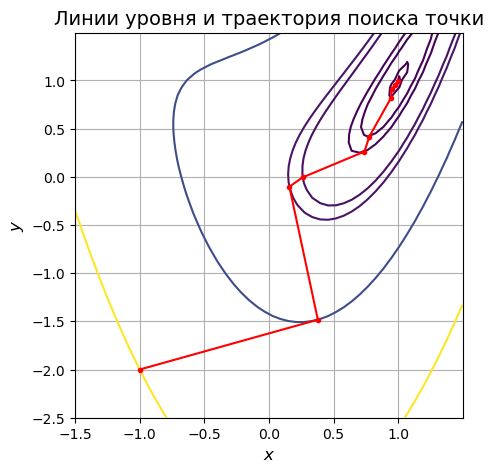

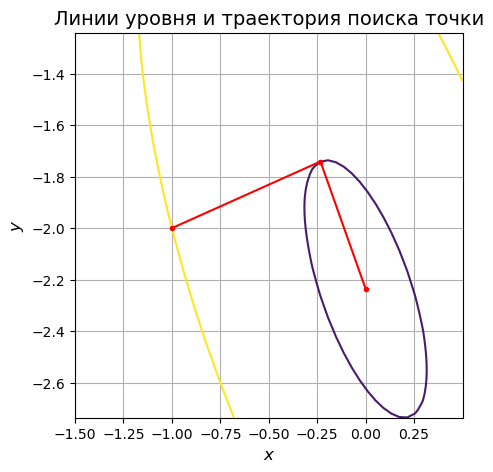

In [57]:
import numpy as np
import math

x0 = [-1, -2]

alpha = 1
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2



x_min, xk, w_norm, n_f, n_g , n_d = newton_method(foo, eps, x0, 2, 0)

a = draw_counterplot(x_min, xk, 0, foo)


foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
# h = lambdify((x_, y_), [[diff(foo(x_, y_), x_, 2), diff(foo(x_, y_), x_, y_)], [diff(foo(x_, y_), y_, x_), diff(foo(x_, y_), y_, 2)]], 'numpy')
# H = lambda x: np.array(h(x[0],x[1]))

x_min, xk, w_norm, n_f, n_g , n_d = newton_method(foo, eps, x0, 2, 0)
#x_min, xk, w_norm, n_f, n_g , n_d= newton_method(foo, eps, x0, i, flag1)

b = draw_counterplot(x_min, xk, 0, foo)

#plt.show()
#print_res(foo, x0, 2, 1, 1)

#x_min, xk, w_norm, n_f, n_g , n_d, n_hess = newton_method(foo, eps, x0, 3, 4, 0)
#draw_al|l(x0, x_min, xk, w_norm, 0, foo, 30, -20)
#draw_all(x0, x_min, xk, w_norm, 0, foo, 45, 170)


# alpha = 200
# foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2

# print_res(foo, x0, 2)


<H3> Make pandas.DateFrame </H3>

In [31]:
import pandas as pd

def make_df(tabledata) -> pd.DataFrame:
        df = pd.DataFrame(tabledata, columns = ['Тип функции', 'Начальная точка', 'Точность', 'Метод', 'Точка минимума функции', 'Значение функции в точке минимума', 'Количество итераций', 'Количество вычислений функции', 'Количество вычисленных градиентов']) #, 'Количество вычисленных матриц Гессе' ])
        return df

<H3> Make sheets</H3>

In [32]:

from sympy import Symbol, lambdify, diff, derive_by_array
from scipy import optimize

#x0 = [-1,-2]
def make_sheets(foo, f_type, x0_mass = [[-1, -2]],  e_help = 2, tabledata = [], extra = -1):

    nu = 0.8
    omega = 0.5
    eps = 10**(-e_help)
    x0 = x0_mass[0]

    if f_type == 0:
        func_name = 'Квадратичная функция'
        flag = 0
    else:
        func_name = 'Функция Розенброка'
        flag = 1
        if extra != -1:
            flag = 0
    

    for j in range(len(x0_mass)):
        
        x0 = x0_mass[j]
        
        for i in range (3):
            
            if i == 0:
                method_name = "Метод ДФП"
                
            elif i == 1:
                method_name = "Метод БФШ"
            elif i == 2:
                method_name = "Метод Пауэлла"
                
            x_min, xk, w_norm, n_f, n_g , n_d = newton_method(foo, eps, x0, i, flag)
            
            temp = [func_name, x0, round(eps, e_help), method_name, [ round(x_min[0], e_help), round(x_min[1], e_help)], round(foo(x_min[0], x_min[1]), e_help), n_d, n_f, n_g] 
            tabledata.append(temp)
            
    return tabledata

<H2>
Calculations
</H2>

<H3> Sheets </H3>


In [33]:
from secrets import randbelow
from tkinter import font


styles = [dict(selector="caption", props=[("text-align", "center"), ("font-size", "150%")])]

e_help = 2

x0 = [[-10, 18]]
x0_mass = [[-1,-2], [0,0], [-2,5], [-10, 18]]

#foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35

foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
tabledata1 = [] # Результаты вычислений квадратичной функции в зависимости от начальной точки
make_sheets(foo, 0, x0_mass, e_help, tabledata1)
df1 = make_df(tabledata1)


alpha = 50
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata2 = [] # Результаты вычислений функции Розенброка в зависимости от начальной точки
make_sheets(foo, 1, x0_mass, e_help, tabledata2)
df2 = make_df(tabledata2)


alpha = 200
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata2 = [] # Результаты вычислений функции Розенброка в зависимости от начальной точки
make_sheets(foo, 1, x0_mass, e_help, tabledata2)
df3 = make_df(tabledata2)

alpha = 1
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
tabledata3 = [] # Результаты вычислений функции Розенброка в зависимости от заданной точности

for i in range(2):
    if i == 0:
        e_help = 3
    else: 
        e_help = 6
    make_sheets(foo, 1, [[-1,-2]], e_help, tabledata3)

df4 = make_df(tabledata3)


In [34]:
df1 = df1.sort_values('Метод')

df1.style.set_caption('Результаты вычислений квадратичной функции в зависимости от начальной точки').set_table_styles(styles)

,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов
1,Квадратичная функция,"[-1, -2]",0.010000,Метод БФШ,"[-0.0, -2.24]",-45.000000,2,52,3
4,Квадратичная функция,"[0, 0]",0.010000,Метод БФШ,"[0.0, -2.24]",-45.000000,2,52,3
7,Квадратичная функция,"[-2, 5]",0.010000,Метод БФШ,"[-0.0, -2.24]",-45.000000,2,52,3
10,Квадратичная функция,"[-10, 18]",0.010000,Метод БФШ,"[0.0, -2.24]",-45.000000,2,52,3
0,Квадратичная функция,"[-1, -2]",0.010000,Метод ДФП,"[-0.0, -2.24]",-45.000000,2,52,3
3,Квадратичная функция,"[0, 0]",0.010000,Метод ДФП,"[0.0, -2.24]",-45.000000,2,52,3
6,Квадратичная функция,"[-2, 5]",0.010000,Метод ДФП,"[0.0, -2.24]",-45.000000,2,52,3
9,Квадратичная функция,"[-10, 18]",0.010000,Метод ДФП,"[0.0, -2.24]",-45.000000,2,52,3
2,Квадратичная функция,"[-1, -2]",0.010000,Метод Пауэлла,"[-0.0, -2.24]",-45.000000,2,52,3
5,Квадратичная функция,"[0, 0]",0.010000,Метод Пауэлла,"[0.0, -2.24]",-45.000000,2,52,3


In [35]:
df2 = df2.sort_values('Начальная точка')

df2.style.set_caption('Результаты вычислений функции Розенброка в зависимости от начальной точки, alpha = 50').set_table_styles(styles)

,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов
9,Функция Розенброка,"[-10, 18]",0.010000,Метод ДФП,"[1.0, 1.0]",0.000000,30,1382,31
10,Функция Розенброка,"[-10, 18]",0.010000,Метод БФШ,"[1.0, 1.0]",0.000000,30,1346,31
11,Функция Розенброка,"[-10, 18]",0.010000,Метод Пауэлла,"[1.0, 1.0]",0.000000,30,1383,31
6,Функция Розенброка,"[-2, 5]",0.010000,Метод ДФП,"[1.0, 1.0]",0.000000,20,896,21
7,Функция Розенброка,"[-2, 5]",0.010000,Метод БФШ,"[1.0, 1.0]",0.000000,20,889,21
8,Функция Розенброка,"[-2, 5]",0.010000,Метод Пауэлла,"[1.0, 1.0]",0.000000,20,901,21
0,Функция Розенброка,"[-1, -2]",0.010000,Метод ДФП,"[1.0, 1.0]",0.000000,14,647,15
1,Функция Розенброка,"[-1, -2]",0.010000,Метод БФШ,"[1.0, 1.0]",0.000000,14,632,15
2,Функция Розенброка,"[-1, -2]",0.010000,Метод Пауэлла,"[1.0, 1.0]",0.000000,14,642,15
3,Функция Розенброка,"[0, 0]",0.010000,Метод ДФП,"[1.0, 1.0]",0.000000,12,528,13


In [36]:
df3 = df3.sort_values('Начальная точка')

df3.style.set_caption('Результаты вычислений функции Розенброка в зависимости от начальной точки, alpha = 200').set_table_styles(styles)


,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов
9,Функция Розенброка,"[-10, 18]",0.010000,Метод ДФП,"[1.0, 1.0]",0.000000,46,2155,47
10,Функция Розенброка,"[-10, 18]",0.010000,Метод БФШ,"[1.0, 1.0]",0.000000,46,2054,47
11,Функция Розенброка,"[-10, 18]",0.010000,Метод Пауэлла,"[1.0, 1.0]",0.000000,46,2094,47
6,Функция Розенброка,"[-2, 5]",0.010000,Метод ДФП,"[1.0, 1.0]",0.000000,34,1519,35
7,Функция Розенброка,"[-2, 5]",0.010000,Метод БФШ,"[1.0, 1.0]",0.000000,34,1499,35
8,Функция Розенброка,"[-2, 5]",0.010000,Метод Пауэлла,"[1.0, 1.0]",0.000000,34,1526,35
0,Функция Розенброка,"[-1, -2]",0.010000,Метод ДФП,"[1.0, 1.0]",0.000000,21,970,22
1,Функция Розенброка,"[-1, -2]",0.010000,Метод БФШ,"[1.0, 1.0]",0.000000,21,945,22
2,Функция Розенброка,"[-1, -2]",0.010000,Метод Пауэлла,"[1.0, 1.0]",0.000000,21,951,22
3,Функция Розенброка,"[0, 0]",0.010000,Метод ДФП,"[1.0, 1.0]",0.000000,15,660,16


In [37]:
df4 = df4.sort_values('Точность')

df4.style.set_caption('Результаты вычислений функции Розенброка в зависимости от заданной точности').set_table_styles(styles)

,Тип функции,Начальная точка,Точность,Метод,Точка минимума функции,Значение функции в точке минимума,Количество итераций,Количество вычислений функции,Количество вычисленных градиентов
3,Функция Розенброка,"[-1, -2]",0.000001,Метод ДФП,"[1.0, 1.0]",0.000000,8,354,9
4,Функция Розенброка,"[-1, -2]",0.000001,Метод БФШ,"[1.0, 1.0]",0.000000,8,355,9
5,Функция Розенброка,"[-1, -2]",0.000001,Метод Пауэлла,"[1.0, 1.0]",0.000000,8,358,9
0,Функция Розенброка,"[-1, -2]",0.001000,Метод ДФП,"[1.0, 1.0]",0.000000,7,310,8
1,Функция Розенброка,"[-1, -2]",0.001000,Метод БФШ,"[1.0, 1.0]",0.000000,7,311,8
2,Функция Розенброка,"[-1, -2]",0.001000,Метод Пауэлла,"[1.0, 1.0]",0.000000,7,314,8


<H2> Plots </H2>


                                Квазиньютоновские методы 

Дано:
------------------------
      Целевая функция:    f(x, y) = 5*x**2 + 4*x*y + 8.94427190999916*x + 2*y**2 + 8.94427190999916*y - 35
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 1e-06
------------------------

                                Метод ДФП 

             Точка минимума функции:     x_min = [0.0, -2.236068]
  Значение функции в точке минимума:  f(x_min) = -45.0
                Количество итераций:         k = 2
      Количество вычислений функции:       n_f = 87
  Количество вычисленных градиентов:       n_g = 3

                                Метод БФШ 

             Точка минимума функции:     x_min = [0.0, -2.236068]
  Значение функции в точке минимума:  f(x_min) = -45.0
                Количество итераций:         k = 2
      Количество вычислений функции:       n_f = 87
  Количество вычисленных градиентов:       n_g = 3

                                Метод Пауэлла 

      

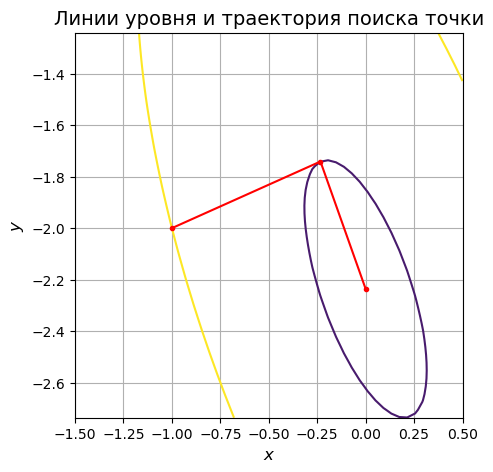

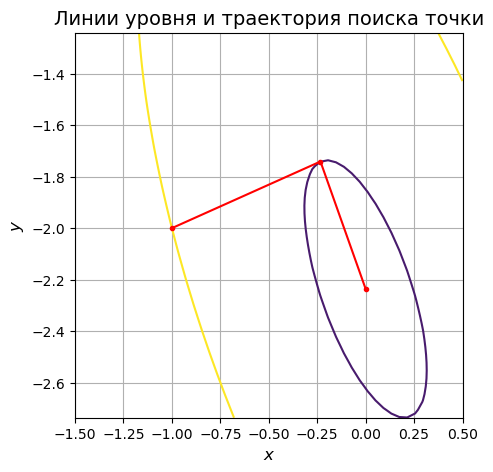

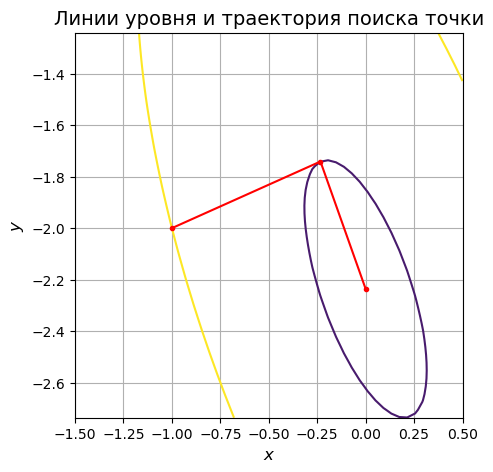


                                Квазиньютоновские методы 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + (x**2 - y)**2
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 0.01
------------------------

                                Метод ДФП 

             Точка минимума функции:     x_min = [1.0, 1.0]
  Значение функции в точке минимума:  f(x_min) = 0.0
                Количество итераций:         k = 6
      Количество вычислений функции:       n_f = 266
  Количество вычисленных градиентов:       n_g = 7

                                Метод БФШ 

             Точка минимума функции:     x_min = [1.0, 1.0]
  Значение функции в точке минимума:  f(x_min) = 0.0
                Количество итераций:         k = 6
      Количество вычислений функции:       n_f = 267
  Количество вычисленных градиентов:       n_g = 7

                                Метод Пауэлла 

             Точка минимума функции:     x_min = [1.0, 1.0]
  Зна

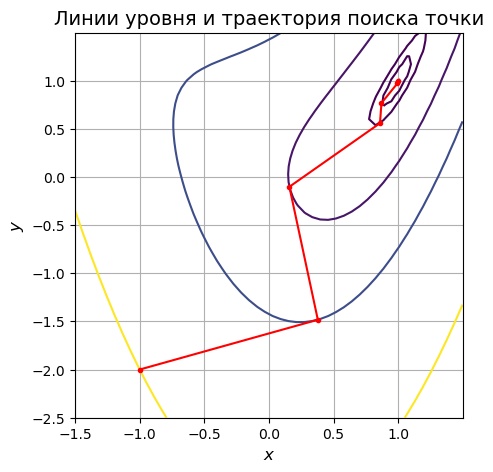

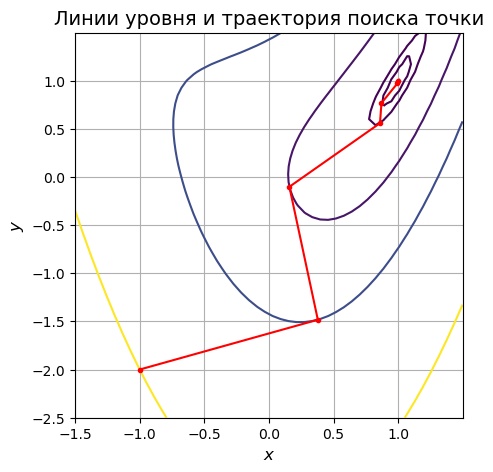

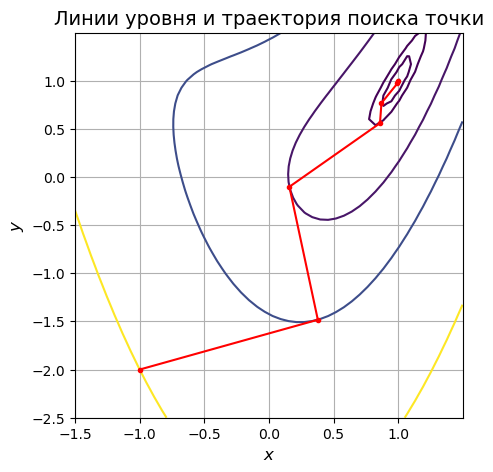


                                Квазиньютоновские методы 

Дано:
------------------------
      Целевая функция:    f(x, y) = (x - 1)**2 + 5*(x**2 - y)**2
Начальное приближение:    (x, y) = [-1, -2]
 Точность приближения:    eps = 1e-06
------------------------

                                Метод ДФП 

             Точка минимума функции:     x_min = [1.0, 1.0]
  Значение функции в точке минимума:  f(x_min) = 0.0
                Количество итераций:         k = 9
      Количество вычислений функции:       n_f = 402
  Количество вычисленных градиентов:       n_g = 10

                                Метод БФШ 

             Точка минимума функции:     x_min = [1.0, 1.0]
  Значение функции в точке минимума:  f(x_min) = 0.0
                Количество итераций:         k = 9
      Количество вычислений функции:       n_f = 405
  Количество вычисленных градиентов:       n_g = 10

                                Метод Пауэлла 

             Точка минимума функции:     x_min = [1.0, 1.0]


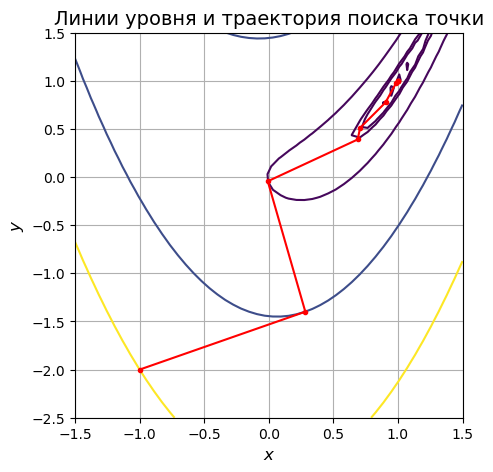

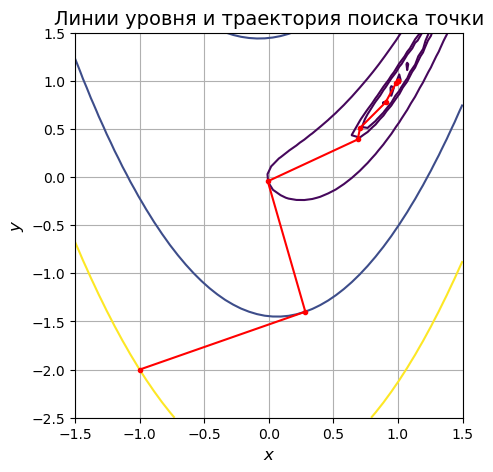

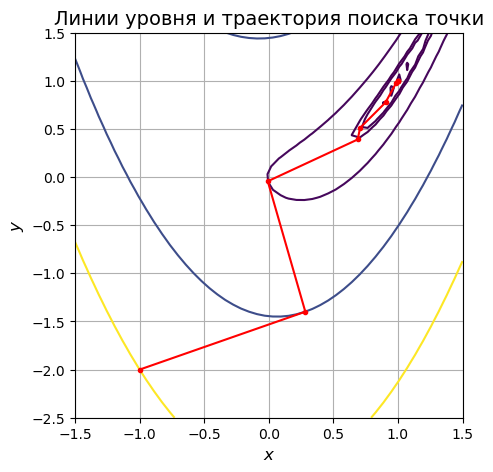

In [48]:
e_help = 2
eps = 10**(-e_help)

x0 = [-1, -2]
#foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
foo = lambda x, y: 5*x**2 + 4* x * y + 2 * y**2 + 4 * math.sqrt(5) * (x +  y) -35
print_res(foo, x0, 6, 0)

alpha = 1
foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22
print_res(foo, x0, 2, 1, 1)

alpha = 5

foo = lambda x, y: alpha * (x**2 - y)**2 + (x - 1)**2
print_res(foo, x0, 6, 1, 1)

#foo = lambda x, y: 6*x**2 - 4* x * y + 3 * y**2 + 4 * math.sqrt(5) * (x +  2*y) +22

#foo = lambda x, y: 10*x**2 - 4* x * y + 7 * y**2 - 4 * math.sqrt(5) * (5*x - y) -16



<H1> Выводы </H1>

Из результатов видно, что для квадратичной функции все медоты работают идентично, т.к. квадратичная функция аппроксимируется квадратичной.

Для функции Розенброка более выгоден метод БФШ: для него будет меньшее количество вычислений функциии.
